<a href="https://colab.research.google.com/github/benthecoder/code-notebooks/blob/main/dsbooks_web_scraping_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [ ]:
# web scraping libraries
from urllib.request import urlopen # open urls
from bs4 import BeautifulSoup # extract data from html files

# ds libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8) # default plot size

# word cloud
from wordcloud import WordCloud, STOPWORDS

# interactive tables
from google.colab import data_table

# regex
import re

# create beautiful soup object

In [ ]:
url = "https://www.learndatasci.com/free-data-science-books/"

# get html of page
html = urlopen(url)

# create bs object
soup = BeautifulSoup(html, 'lxml') # using lxml parser

## Title of website

In [ ]:
# get title
title = soup.title
print(title.get_text())

100+ Free Data Science Books – LearnDataSci


## html of a single book

In [ ]:
books = soup.find_all('section', attrs={"class": ""}) # to prevent getting ad section

book1 = books[0]
print(book1.prettify())

<section>
 <div class="book row" isbn-data="0136042597">
  <div class="col-lg-4">
   <div style="width:100%;">
    <img alt="Artificial Intelligence A Modern Approach, 1st Edition" class="book-cover" height="261" src="https://storage.googleapis.com/lds-media/images/Artificial-Intelligence-A-Modern-Approach_2015.width-200.png" width="200"/>
   </div>
  </div>
  <div class="col-lg-8">
   <div class="star-ratings">
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/star-outline.svg"/>
    <b>
     4.2
    </b>
    <span>
     (342 Ratings)
    </span>
    <button data-tooltip="Good Reads: 4.2">
     ?
    </button>
   </div>
   <div class="star-ratings">
   </div>


## Grabbing all necessary info

In [ ]:
rating = book1.find(class_='star-ratings').find('b').get_text()
total_ratings = book1.find(class_='star-ratings').find('span').get_text()
total_ratings = re.search(r'\d+', total_ratings).group() # get numbers only
book_cat = book1.find(class_='book-cats').get_text()
title = book1.find('h2').get_text()
author, year = book1.find(class_='meta-auth').find('b').get_text().split(', ')
desc = book1.find('p').get_text()
links = book1.find_all('a')
book_link = links[0].get('href')
review_link = links[1].get('href')

print(f"title: {title}")
print(f"category: {book_cat}")
print(f"author: {author}")
print(f"year: {year}")
print(f"rating: {rating}")
print(f"total_ratings: {total_ratings}")
print(f"description: {desc}")
print(f"link: {book_link}")
print(f"review link: {review_link}")

title: Artificial Intelligence A Modern Approach, 1st Edition
category: Artificial Intelligence
author: Stuart Russell
year: 1995
rating: 4.2
total_ratings: 342
description: Comprehensive, up-to-date introduction to the theory and practice of artificial intelligence. Number one in its field, this textbook is ideal for one or two-semester, undergraduate or graduate-level courses in Artificial Intelligence.
link: http://www.cin.ufpe.br/~tfl2/artificial-intelligence-modern-approach.9780131038059.25368.pdf
review link: http://www.amazon.com/gp/product/0136042597/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=0136042597&linkCode=as2&tag=learnds-20&linkId=3FRORB7P56CEWSK5


## Dealing with missing components
- books without year & multiple authors
- books without rating
- books without review links
- books without descriptoin

In [ ]:
book7 = books[7] # book without year
book35 = books[35] # book without year but multiple author
book17 = books[17] # book with multiple authors

print(book1.find(class_='meta-auth').find('b').get_text())
print(book7.find(class_='meta-auth').find('b').get_text())
print(book35.find(class_='meta-auth').find('b').get_text())
print(book17.find(class_='meta-auth').find('b').get_text())

Stuart Russell, 1995
Jeff Leek
Jeffrey Stanton, Syracuse University
Yoshua Bengio, Ian J. Goodfellow, & Aaron Courville, 2015


In [ ]:
# author = book1.find(class_='meta-auth').find('b').get_text()
# author = book7.find(class_='meta-auth').find('b').get_text()
author = book17.find(class_='meta-auth').find('b').get_text()
author = book35.find(class_='meta-auth').find('b').get_text()

# some books don't have year and has multiple authors
if (re.search(r'\d+', author) != None):
  author_year = author.split(", ")
  author = ", ".join(str for str in author_year[:-1])
  year = author_year[-1]
else:
  year = None

print(author)
print(year)

Jeffrey Stanton, Syracuse University
None


In [ ]:
book23 = books[23] # book without rating

print(book1.find(class_='star-ratings').prettify())
print()
print(book23.find(class_='star-ratings').prettify())

<div class="star-ratings">
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/star-outline.svg"/>
 <b>
  4.2
 </b>
 <span>
  (342 Ratings)
 </span>
 <button data-tooltip="Good Reads: 4.2">
  ?
 </button>
</div>


<div class="star-ratings">
</div>



In [ ]:
# rating = book1.find(class_='star-ratings').find('b')
# total_ratings = book1.find(class_='star-ratings').find('span')
rating = book23.find(class_='star-ratings').find('b')
total_ratings = book23.find(class_='star-ratings').find('span')

# some books don't have ratings
if (rating != None and total_ratings != None):
  rating = rating.get_text()
  total_ratings = total_ratings.get_text()
  total_ratings = re.search(r'\d+', total_ratings).group()


print(rating)
print(total_ratings)

None
None


In [ ]:
book8 = books[8] # book without review link

print(len(book1.find_all('a')))
print(len(book8.find_all('a')))

2
1


In [ ]:
links = book8.find_all('a')
book_link = links[0].get('href')

if (len(links) == 2):
  review_link = links[1].get('href')
else:
  review_link = None
  
print(book_link)
print(review_link)

http://ciml.info/dl/v0_9/ciml-v0_9-all.pdf
None


In [ ]:
book13 = books[13] # book without desc

print(book1.find('p'))
print(book13.find('p'))

<p>Comprehensive, up-to-date introduction to the theory and practice of artificial intelligence. Number one in its field, this textbook is ideal for one or two-semester, undergraduate or graduate-level courses in Artificial Intelligence.</p>
None


## get info for each book and add to lists

create list for each type, and use a function to append info of each book to list

In [ ]:
title_list = []
book_cat_list = []
author_list = []
year_list = []
rating_list = []
total_ratings_list = []
description_list = []
book_link_list = []
review_link_list = []

In [ ]:
def getInfo(book):

  # get and add title data
  title = book.find('h2')
  title_list.append(title.get_text())

  book_cat = book.find(class_='book-cats')
  if book_cat != None:
    book_cat = book_cat.get_text()

  book_cat_list.append(book_cat)

  # get author and year data
  author = book.find(class_='meta-auth').find('b').get_text()

  # some books don't have year and some books have multiple authors
  if (re.search(r'\d+', author) != None):
    author_year = author.split(", ")
    author = ", ".join(str for str in author_year[:-1])
    year = author_year[-1]
  else:
    year = None
  
  author_list.append(author)
  year_list.append(year)

  # get rating and total number of ratings
  rating = book.find(class_='star-ratings').find('b')
  total_ratings = book.find(class_='star-ratings').find('span')

  # some books don't have ratings
  if (rating != None and total_ratings != None):
    rating = rating.get_text()
    total_ratings = total_ratings.get_text()
    total_ratings = re.search(r'\d+', total_ratings).group() # get numbers only

  rating_list.append(rating)
  total_ratings_list.append(total_ratings)

  # get description
  desc = book.find('p')

  # books without description
  if (desc != None):
    desc = desc.get_text()

  description_list.append(desc)

  # get book links and review links
  links = book.find_all('a')
  
  book_link = links[0].get('href')
  book_link_list.append(book_link)

  # Some books don't have links
  if (len(links) == 2):
    review_link = links[1].get('href')
  else:
    review_link = None

  review_link_list.append(review_link)

In [ ]:
for book in books:
  getInfo(book)

## build pandas dataframe

In [ ]:
df_books = pd.DataFrame({
    "title": title_list,
    "book_cat" : book_cat_list,
    "author": author_list,
    "year": year_list,
    "rating": rating_list, 
    "total_ratings": total_ratings_list,
    "description": description_list,
    "book_link": book_link_list,
    "review_link":review_link_list
})
df_books.head()

,title,book_cat,author,year,rating,total_ratings,description,book_link,review_link
0,"Artificial Intelligence A Modern Approach, 1st...",Artificial Intelligence,Stuart Russell,1995,4.2,342,"Comprehensive, up-to-date introduction to the ...",http://www.cin.ufpe.br/~tfl2/artificial-intell...,http://www.amazon.com/gp/product/0136042597/re...
1,Learning Deep Architectures for AI,Artificial Intelligence,Yoshua Bengio,2009,4.0,18,Foundations and Trends(r) in Machine Learning.,http://www.iro.umontreal.ca/~bengioy/papers/ft...,https://www.amazon.com/Learning-Architectures-...
2,The LION Way: Machine Learning plus Intelligen...,Artificial Intelligence,Roberto Battiti & Mauro Brunato,2013,3.8,2,Learning and Intelligent Optimization (LION) i...,http://www.e-booksdirectory.com/details.php?eb...,https://www.amazon.com/The-LION-Way-Intelligen...
3,Disruptive Possibilities: How Big Data Changes...,Big Data,Jeffrey Needham,2013,3.5,114,This book provides an historically-informed ov...,http://www.oreilly.com/data/free/files/disrupt...,http://www.amazon.com/gp/product/B00CLH387W/re...
4,Computer Vision,Computer Science Topics,Richard Szeliski,2010,4.2,101,Challenging real-world applications where visi...,http://szeliski.org/Book/,http://www.amazon.com/gp/product/1848829345/re...


In [ ]:
df_books.shape

(97, 9)

In [ ]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          97 non-null     object
 1   book_cat       96 non-null     object
 2   author         97 non-null     object
 3   year           80 non-null     object
 4   rating         58 non-null     object
 5   total_ratings  58 non-null     object
 6   description    79 non-null     object
 7   book_link      97 non-null     object
 8   review_link    55 non-null     object
dtypes: object(9)
memory usage: 6.9+ KB


# Data cleaning

In [ ]:
df_books.isnull().sum()

title             0
book_cat          1
author            0
year             17
rating           39
total_ratings    39
description      18
book_link         0
review_link      42
dtype: int64

In [ ]:
df_books[df_books['book_cat'].isnull()]

,title,book_cat,author,year,rating,total_ratings,description,book_link,review_link
96,Pattern Recognition and Machine Learning,None,Christopher M. Bishop,2006,4.3,1561,This is the first textbook on pattern recognit...,https://www.microsoft.com/en-us/research/publi...,https://www.amazon.com/Pattern-Recognition-Lea...


In [ ]:
df_books['book_cat'].unique()

array(['Artificial Intelligence', 'Big Data', 'Computer Science Topics',
       'Data Analysis', 'Data Mining and Machine Learning',
       'Data Science in General', 'Data Visualization',
       'Distributed Computing Tools', 'Forming Data Science Teams',
       'Interviews with Data Scientists', 'Learning Languages',
       'Math Topics', 'SQL, NoSQL, and Databases', 'Statistics', None],
      dtype=object)

In [ ]:
df_books.fillna({'rating': '0.0'}, inplace=True)
df_books.fillna({'total_ratings':'0'}, inplace=True)
df_books.fillna({'book_cat': 'Artificial Intelligence'}, inplace=True)
df_books.fillna({'description':'None'}, inplace=True)
df_books.fillna({'review_link':'None'}, inplace=True)
df_books.isnull().sum()

title             0
book_cat          0
author            0
year             17
rating            0
total_ratings     0
description       0
book_link         0
review_link       0
dtype: int64

In [ ]:
# data transformation
df_books = df_books.convert_dtypes() # convert all to string

# convert to datetime
df_books['year'] = df_books['year'].astype('Int64')
df_books['rating'] = df_books['rating'].astype('float64')
df_books['total_ratings'] = df_books['total_ratings'].astype('Int64')

df_books.dtypes

title             string
book_cat          string
author            string
year               Int64
rating           float64
total_ratings      Int64
description       string
book_link         string
review_link       string
dtype: object

# EDA

In [ ]:
df_books[['rating', 'total_ratings']].describe()

,rating,total_ratings
count,97.000000,97.000000
mean,2.396907,113.711340
std,1.993137,294.153374
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.600000,8.000000
75%,4.100000,82.000000
max,4.600000,1659.000000


## Word cloud plot of book titles

In [ ]:
text = " ".join(title for title in df_books.title)
print ("There are {} words in the combination of all titles.".format(len(text)))

There are 3347 words in the combination of all titles.


In [ ]:
def plot_wordcloud(text, file_name, stopwords_list=[], max_words = 500):
  # create stopword list
  stopwords = set(STOPWORDS)
  stopwords.update(stopwords_list)

  # generate word cloud 
  wordcloud = WordCloud(width=1000, height = 600,
                        stopwords=stopwords,
                        max_words = max_words,
                        background_color="white").generate(text)

  # generate plot
  wordcloud.to_file(file_name + ".png");

  # Display the generated image:

  plt.figure(figsize=(12,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off");

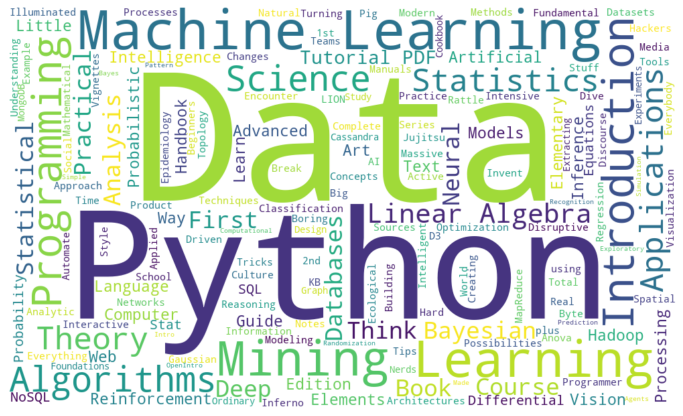

In [ ]:
plot_wordcloud(text, "100ds_titles")

## Word cloud of book descriptions

In [ ]:
text = " ".join(desc for desc in df_books.description)
print ("There are {} words in the combination of all description.".format(len(text)))

There are 15618 words in the combination of all description.


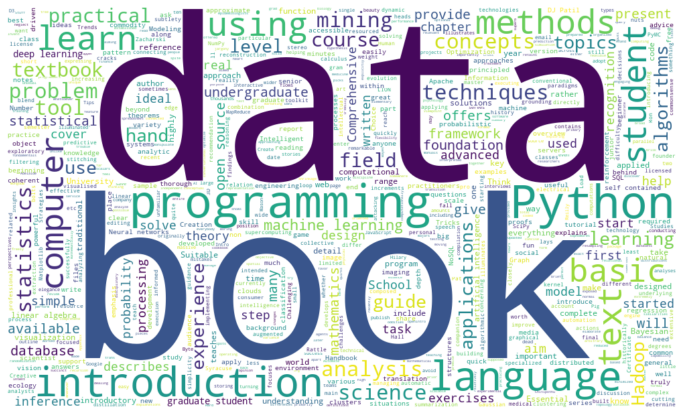

In [ ]:
plot_wordcloud(text, "100ds_book_descriptions", ['None'], 1000) # add None to stopwords

# Histogram plot of book category

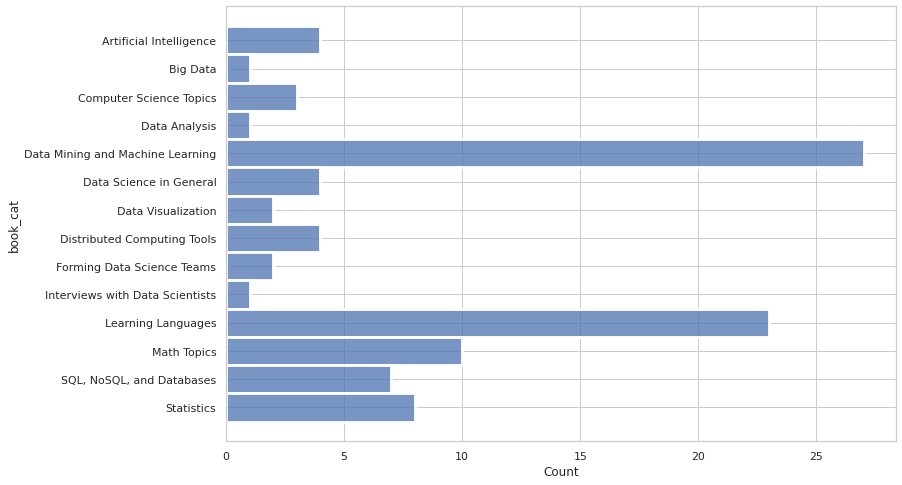

In [ ]:
sns.histplot(data=df_books, y='book_cat', discrete=True);

## Histogram plot of year

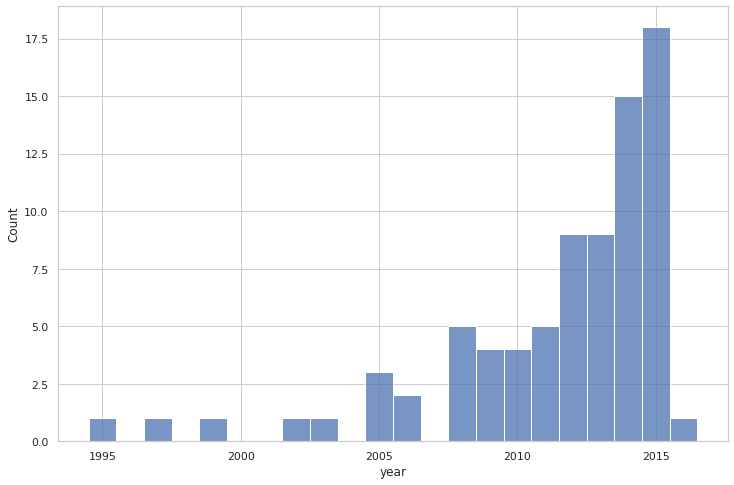

In [ ]:
sns.histplot(data=df_books, x='year', discrete=True);

## Plot of rating and total ratings

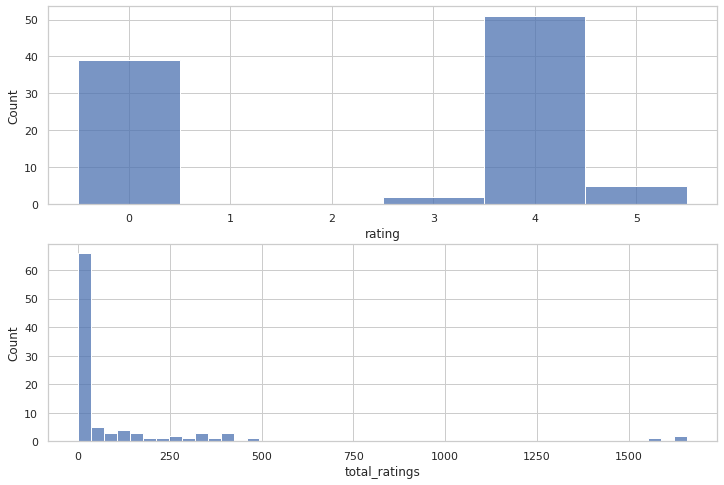

In [ ]:
fig, axes = plt.subplots(2)

sns.histplot(data=df_books, x='rating', discrete=True, ax = axes[0]);
sns.histplot(data=df_books, x='total_ratings', ax = axes[1]);

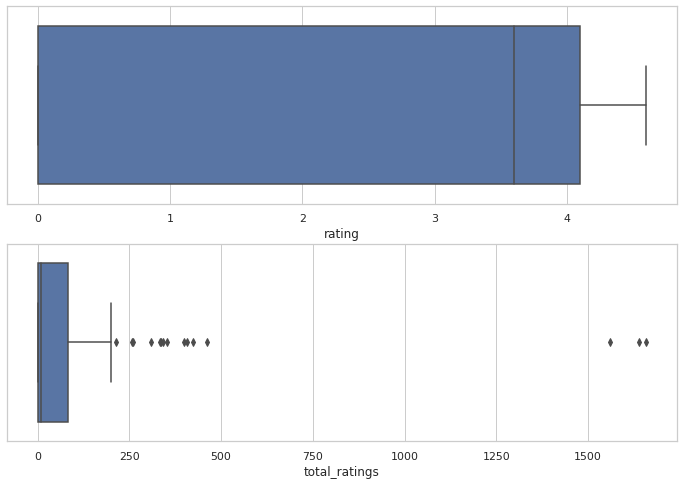

In [ ]:
fig, axes = plt.subplots(2)

sns.boxplot(x=df_books['rating'], ax = axes[0]);
sns.boxplot(x=df_books['total_ratings'], ax = axes[1]);

## scatterplot of rating and total ratings

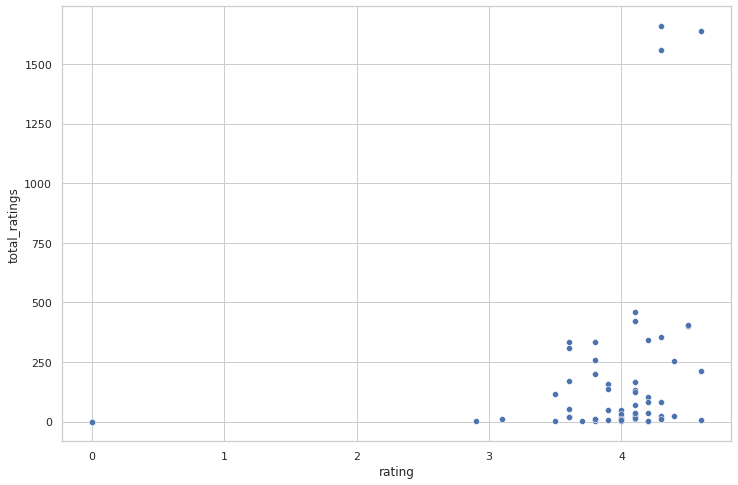

In [ ]:
sns.scatterplot(data=df_books, x='rating', y='total_ratings');

## strip plot of rating and total_ratings

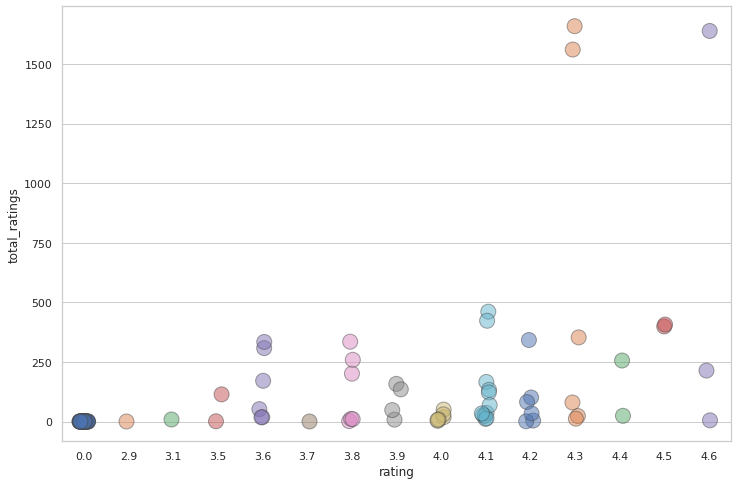

In [ ]:
sns.stripplot(x='rating', y = 'total_ratings', data=df_books, 
              linewidth=1, size = 15, alpha=.50, palette = "deep");

## Which are the tree books with high total ratings and rating from our plot?



In [ ]:
df_books[(df_books['total_ratings'] > 1400) & (df_books['rating'] > 4.0)].iloc[:, :5]

,title,book_cat,author,year,rating
51,Automate the Boring Stuff with Python: Practic...,Learning Languages,Al Sweigart,2015,4.3
89,An Introduction to Statistical Learning with A...,Statistics,"Gareth James, Daniela Witten, Trevor Hastie, &...",2013,4.6
96,Pattern Recognition and Machine Learning,Artificial Intelligence,Christopher M. Bishop,2006,4.3


## Top 10 books in total ratings?

In [ ]:
df_books.sort_values(by=['total_ratings'], ascending=False)[:10].iloc[:, :5]

,title,book_cat,author,year,rating
51,Automate the Boring Stuff with Python: Practic...,Learning Languages,Al Sweigart,2015,4.3
89,An Introduction to Statistical Learning with A...,Statistics,"Gareth James, Daniela Witten, Trevor Hastie, &...",2013,4.6
96,Pattern Recognition and Machine Learning,Artificial Intelligence,Christopher M. Bishop,2006,4.3
5,Natural Language Processing with Python,Computer Science Topics,Steven Bird,2009,4.1
40,Interactive Data Visualization for the Web,Data Visualization,Scott Murray,2013,4.1
31,Reinforcement Learning: An Introduction,Data Mining and Machine Learning,Richard S. Sutton & Andrew G. Barto,2012,4.5
19,"Information Theory, Inference, and Learning Al...",Data Mining and Machine Learning,David J.C. MacKay,2005,4.5
60,Python for Everybody,Learning Languages,Dr. Charles R Severance,2016,4.3
0,"Artificial Intelligence A Modern Approach, 1st...",Artificial Intelligence,Stuart Russell,1995,4.2
46,Data Driven: Creating a Data Culture,Forming Data Science Teams,"DJ Patil,‎ Hilary Mason",<NA>,3.8


# Top 10 books in terms of total rating and rating?

In [ ]:
df_books.sort_values(by=['rating', 'total_ratings'], ascending=False)[:10].iloc[:, :5]

,title,book_cat,author,year,rating
89,An Introduction to Statistical Learning with A...,Statistics,"Gareth James, Daniela Witten, Trevor Hastie, &...",2013,4.6
49,Advanced R,Learning Languages,Hadley Wickham,2014,4.6
73,Elementary Differential Equations,Math Topics,William F. Trench,2013,4.6
31,Reinforcement Learning: An Introduction,Data Mining and Machine Learning,Richard S. Sutton & Andrew G. Barto,2012,4.5
19,"Information Theory, Inference, and Learning Al...",Data Mining and Machine Learning,David J.C. MacKay,2005,4.5
93,The Elements of Statistical Learning: Data Min...,Statistics,"Trevor Hastie, Robert Tibshirani, & Jerome Fri...",2008,4.4
26,Mining of Massive Datasets,Data Mining and Machine Learning,"Jure Leskovec, Anand Rajaraman, & Jeff Ullman",2014,4.4
51,Automate the Boring Stuff with Python: Practic...,Learning Languages,Al Sweigart,2015,4.3
96,Pattern Recognition and Machine Learning,Artificial Intelligence,Christopher M. Bishop,2006,4.3
60,Python for Everybody,Learning Languages,Dr. Charles R Severance,2016,4.3


## Interactive table

In [ ]:
data_table.DataTable(df_books, include_index=False, num_rows_per_page=5)

,title,book_cat,author,year,rating,total_ratings,description,book_link,review_link
0,"Artificial Intelligence A Modern Approach, 1st...",Artificial Intelligence,Stuart Russell,1995,4.2,342,"Comprehensive, up-to-date introduction to the ...",http://www.cin.ufpe.br/~tfl2/artificial-intell...,http://www.amazon.com/gp/product/0136042597/re...
1,Learning Deep Architectures for AI,Artificial Intelligence,Yoshua Bengio,2009,4.0,18,Foundations and Trends(r) in Machine Learning.,http://www.iro.umontreal.ca/~bengioy/papers/ft...,https://www.amazon.com/Learning-Architectures-...
2,The LION Way: Machine Learning plus Intelligen...,Artificial Intelligence,Roberto Battiti & Mauro Brunato,2013,3.8,2,Learning and Intelligent Optimization (LION) i...,http://www.e-booksdirectory.com/details.php?eb...,https://www.amazon.com/The-LION-Way-Intelligen...
3,Disruptive Possibilities: How Big Data Changes...,Big Data,Jeffrey Needham,2013,3.5,114,This book provides an historically-informed ov...,http://www.oreilly.com/data/free/files/disrupt...,http://www.amazon.com/gp/product/B00CLH387W/re...
4,Computer Vision,Computer Science Topics,Richard Szeliski,2010,4.2,101,Challenging real-world applications where visi...,http://szeliski.org/Book/,http://www.amazon.com/gp/product/1848829345/re...
...,...,...,...,...,...,...,...,...,...
92,OpenIntro Statistics,Statistics,"David M Diez, Christopher D Barr, & Mine Çetin...",2015,4.1,34,"Probability is optional, inference is key, and...",https://www.openintro.org/book/os/,https://www.amazon.com/OpenIntro-Statistics-Th...
93,The Elements of Statistical Learning: Data Min...,Statistics,"Trevor Hastie, Robert Tibshirani, & Jerome Fri...",2008,4.4,256,This book describes the important ideas in a v...,http://statweb.stanford.edu/~tibs/ElemStatLear...,http://www.amazon.com/gp/product/0387848576/re...
94,Think Bayes: Bayesian Statistics Made Simple,Statistics,Allen B. Downey,2012,3.9,48,Think Bayes is an introduction to Bayesian sta...,http://greenteapress.com/thinkbayes/,http://www.amazon.com/gp/product/1449370780/re...
95,Think Stats: Exploratory Data Analysis in Python,Statistics,Allen B. Downey,2014,3.6,334,This concise introduction shows you how to per...,http://greenteapress.com/thinkstats2/thinkstat...,http://www.amazon.com/gp/product/1449307116/re...


In [ ]:
df_books.to_csv('100_DS_books.csv', index=False)